<a href="https://colab.research.google.com/github/SpenBobCat/First_Python_Image/blob/main/First_Python_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build Your First Python Image.**

Docker Docs - https://docs.docker.com/language/python/?uuid=69F96C9F-E3C2-4459-A61C-92C7AAA9671E

By: Michael Spencer 5/15/2023

# **What will you learn in this module?**

The Python getting started guide teaches you how to create a containerized Python application using Docker. In this guide, you’ll learn how to:

- Create a sample Python application
- Create a new Dockerfile which contains instructions required to - build a Python image
- Build an image and run the newly built image as a container
- Set up volumes and networking
- Orchestrate containers using Compose
- Use containers for development
- Configure a CI/CD pipeline for your application using GitHub Actions
- Deploy your application to the cloud

After completing the Python getting started modules, you should be able to containerize your own Python application based on the examples and instructions provided in this guide.

Let’s get started!

**Build your first Python image**

# **Build your Python image**

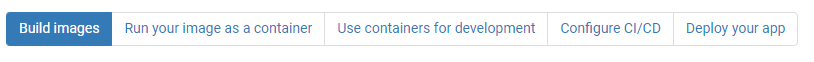


**Prerequisites:**

- You understand basic Docker concepts.
- You’re familiar with the Dockerfile format.
- You have enabled BuildKit on your machine.

**Overview:**

Now that you have a good overview of containers and the Docker platform, let’s take a look at building your first image. An image includes everything needed to run an application - the code or binary, runtime, dependencies, and any other file system objects required.

**To complete this tutorial, you need the following:**

- Python version 3.8 or later. https://www.python.org/downloads/
- Docker running locally. Follow the instructions to https://docs.docker.com/desktop/
- An IDE or a text editor to edit files. We recommend using https://code.visualstudio.com/Download.

**Sample application:**

The sample application uses the popular Flask framework.

Create a directory on your local machine named python-docker and follow the steps below to activate a Python virtual environment, install Flask as a dependency, and create a Python code file.


```
cd /path/to/python-docker
python3 -m venv .venv
source .venv/bin/activate
(.venv) $ python3 -m pip install Flask
(.venv) $ python3 -m pip freeze > requirements.txt
(.venv) $ touch app.py
```


Add code to handle simple web requests. Open the python-docker directory in your favorite IDE and enter the following code into the **app.py** file.



```
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, Docker!'
```



# **Test the application**

Start the application and make sure it’s running. Open your terminal and navigate to the working directory you created.



```
cd /path/to/python-docker
source .venv/bin/activate
(.venv) $ python3 -m flask run
```



To test that the application is working, open a new browser and navigate to http://localhost:5000.

Switch back to the terminal where the server is running and you should see the following requests in the server logs. The data and timestamp will be different on your machine.



```
127.0.0.1 - - [22/Sep/2020 11:07:41] "GET / HTTP/1.1" 200 -
```



# **Create a Dockerfile for Python**

Now that the application is running, you can create a Dockerfile from it.

Inside the python-docker directory create a Dockerfile and add a line that tells Docker what base image to use for the application.



```
# syntax=docker/dockerfile:1

FROM python:3.8-slim-buster
```



Docker images can inherit from other images. Therefore, instead of creating your own base image, you can use the official Python image that has all the tools and packages needed to run a Python application.

To make things easier when running the remaining commands, create a working directory. This instructs Docker to use this path as the default location for all subsequent commands. This means you can use relative file paths based on the working directory instead of full file paths.



```
WORKDIR /app
```



Usually, the first thing you do with a project written in Python is to install pip packages to ensure the application has all its dependencies installed.

Before running **pip3 install**, you need the **requirements.txt** file into the image. Use the **COPY** command to do this.

The **COPY** command takes two parameters. The first parameter tells Docker what file(s) you would like to copy into the image. The second parameter tells Docker where to copy that file(s) to. For this example, copy the **requirements.txt** file into the **working directory /app**.



```
COPY requirements.txt requirements.txt
```



With the **requirements.txt** file inside the image, you can use the **RUN** command to run **pip3 install**. This works exactly the same as running **pip3 install** locally on a machine, but this time pip installs the modules into the image.



```
RUN pip3 install -r requirements.txt
```



At this point, you have an image based on Python version 3.8 and have installed the dependencies. The next step is to add the source code into the image. Use the **COPY** command as with the **requirements.txt** file. This **COPY** command takes all the files located in the current directory and copies them into the image.



```
COPY . .
```



Now, tell Docker what command to run when the image is executed inside a container using the **CMD** command. Note that you need to make the application externally visible (i.e. from outside the container) by specifying **--host=0.0.0.0.**



```
CMD ["python3", "-m" , "flask", "run", "--host=0.0.0.0"]
```



Here’s the complete Dockerfile.



```
# syntax=docker/dockerfile:1

FROM python:3.8-slim-buster

WORKDIR /app

COPY requirements.txt requirements.txt
RUN pip3 install -r requirements.txt

COPY . .

CMD ["python3", "-m" , "flask", "run", "--host=0.0.0.0"]
```



# **Directory structure**

Just to recap, you created a directory on your local machine called **python-docker** and created a simple Python application using the Flask framework. You used the **requirements.txt** file to gather requirements, and created a **Dockerfile** containing the commands to build an image. The Python application directory structure should now look like the following:



```
python-docker
|____ app.py
|____ requirements.txt
|____ Dockerfile
```



# **Build an image**

Now that you’ve created the **Dockerfile**, let’s build the image. To do this, use the **docker build** command. The **docker build** command builds Docker images from a Dockerfile and a “context”. A build’s context is the set of files located in the specified PATH or URL. The Docker build process can access any of the files located in this context.

The build command optionally takes a **--tag** flag. The tag sets the name of the image and an optional tag in the format **name:tag**. Leave off the optional tag for now to help simplify things. If you don’t pass a tag, Docker uses “latest” as its default tag.

Build the Docker image.



```
docker build --tag python-docker .
[+] Building 2.7s (10/10) FINISHED
 => [internal] load build definition from Dockerfile
 => => transferring dockerfile: 203B
 => [internal] load .dockerignore
 => => transferring context: 2B
 => [internal] load metadata for docker.io/library/python:3.8-slim-buster
 => [1/6] FROM docker.io/library/python:3.8-slim-buster
 => [internal] load build context
 => => transferring context: 953B
 => CACHED [2/6] WORKDIR /app
 => [3/6] COPY requirements.txt requirements.txt
 => [4/6] RUN pip3 install -r requirements.txt
 => [5/6] COPY . .
 => [6/6] CMD ["python3", "-m", "flask", "run", "--host=0.0.0.0"]
 => exporting to image
 => => exporting layers
 => => writing image sha256:8cae92a8fbd6d091ce687b71b31252056944b09760438905b726625831564c4c
 => => naming to docker.io/library/python-docker
```



# **View local images**

To see a list of images you have on your local machine, you have two options. One is to use the Docker CLI and the other is to use Docker Desktop. As you are working in the terminal already, take a look at listing images using the CLI.

To list images, run the docker images command.



```
$ docker images
REPOSITORY      TAG               IMAGE ID       CREATED         SIZE
python-docker   latest            8cae92a8fbd6   3 minutes ago   123MB

```


You should see at least one image listed, including the image you just built **python-docker:latest**.

# **Tag images**

As mentioned earlier, an image name is made up of slash-separated name components. Name components may contain lowercase letters, digits, and separators. A separator can include a period, one or two underscores, or one or more dashes. A name component may not start or end with a separator.

An image is made up of a manifest and a list of layers. Don’t worry too much about manifests and layers at this point other than a “tag” points to a combination of these artifacts. You can have multiple tags for an image. Let’s create a second tag for the image you built and take a look at its layers.

To create a new tag for the image you built, run the following command.



```
docker tag python-docker:latest python-docker:v1.0.0
```



The docker tag command creates a new tag for an image. It doesn’t create a new image. The tag points to the same image and is just another way to reference the image.

Now, run the docker images command to see a list of the local images.



```
$ docker images
REPOSITORY      TAG               IMAGE ID       CREATED         SIZE
python-docker   latest            8cae92a8fbd6   4 minutes ago   123MB
python-docker   v1.0.0            8cae92a8fbd6   4 minutes ago   123MB
python          3.8-slim-buster   be5d294735c6   9 days ago      113MB
```



You can see that two images start with python-docker. You know they’re the same image because if you take a look at the IMAGE ID column, you can see that the values are the same for the two images.

Remove the tag you just created. To do this, use the rmi command. The rmi command stands for remove image.



```
$ docker rmi python-docker:v1.0.0
Untagged: python-docker:v1.0.0
```



Note that the response from Docker tells you that Docker didn’t remove the image, but only “untagged” it. You can check this by running the docker images command.



```
$ docker images
REPOSITORY      TAG               IMAGE ID       CREATED         SIZE
python-docker   latest            8cae92a8fbd6   6 minutes ago   123MB
python          3.8-slim-buster   be5d294735c6   9 days ago      113MB
```



# **Next steps**

This module looked at setting up an example Python application used for the rest of the tutorial, and created a Dockerfile used to build the Docker image. It also looked at tagging and removing images.

The next module will take a look at how to:

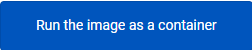
